In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hddCRP.dataLoader as dl
results_directory = "Results/populationNew2/"

In [5]:
def plot_population_fit(grps = ["uniform_H", "uniform_T", "diverse_TH", "diverse_HT"], prefix = ''):
    fit_file = f"{results_directory}/{prefix}fit"
    fit_file += f".pkl"

    data_fits = pd.read_pickle(fit_file)

    # data_fits["alpha.3"] = 0
    df = data_fits[["group", "timeconstant", "subject_similarity", "context_a_depth_1", "context_b_depth_1",
                    "alpha.1", "alpha.2", "alpha.3"]]


    df["alpha_0"] = df["alpha.1"] + df["alpha.2"] + df["alpha.3"]
    df["p_left_base"] = df["alpha.1"]/df["alpha_0"]
    df["p_straight_base"] = df["alpha.2"]/df["alpha_0"]
    df["p_right_base"] = df["alpha.3"]/df["alpha_0"]

    # grps = ["uniform_H", "uniform_T"]
    # grps = ["diverse_TH", "diverse_HT"]
    # grps = ["uniform_H", "uniform_T", "diverse_TH", "diverse_HT"]
    # grps = ["uniform_H", "uniform_T", "uniform"]
    # grps = ["diverse_TH", "diverse_HT", "diverse"]
    # grps = ["uniform", "diverse"]
    # grps = ["uniform_H", "uniform_T", "diverse"]
    df = df.query("group in @grps")

    NR = 4;
    NC = 3;
    plt.figure(figsize=(NC*6,NR*5))
    plt.subplot(NR,NC,1)
    sns.histplot(df, x="timeconstant", hue="group")
    plt.subplot(NR,NC,2)
    sns.histplot(df, x="subject_similarity", hue="group")
    plt.subplot(NR,NC,3)
    sns.histplot(df, x="alpha_0", hue="group")


    plt.subplot(NR,NC,4)
    sns.histplot(df, x="context_a_depth_1", hue="group")
    plt.subplot(NR,NC,5)
    sns.histplot(df, x="context_b_depth_1", hue="group")
    plt.subplot(NR,NC,6)
    sns.scatterplot(df, x="context_a_depth_1", y="context_b_depth_1", hue="group", s=1.5)


    # plt.subplot(NR,NC,7)
    # sns.histplot(df, x="alpha.1", hue="group")
    # plt.subplot(NR,NC,8)
    # sns.histplot(df, x="alpha.2", hue="group")
    # plt.subplot(NR,NC,9)
    # sns.histplot(df, x="alpha.3", hue="group")


    plt.subplot(NR,NC,7)
    sns.histplot(df, x="p_left_base", hue="group")
    plt.subplot(NR,NC,8)
    sns.histplot(df, x="p_right_base", hue="group")
    plt.subplot(NR,NC,9)
    sns.histplot(df, x="p_straight_base", hue="group")


    plt.subplot(NR,NC,10)
    # sns.histplot(df, x="p_left_base", hue="group")
    sns.scatterplot(df, x="p_left_base", y="p_right_base", hue="group", s=1.5)
    plt.plot([0,1],[1,0],'k:')
    plt.plot([0,2/3],[2/3,0],'k:')
    plt.plot([0,1/3],[1/3,0],'k:')
    plt.subplot(NR,NC,11)
    # sns.histplot(df, x="p_right_base", hue="group")
    sns.scatterplot(df, x="p_straight_base", y="p_right_base", hue="group", s=1.5)
    plt.plot([0,1],[1,0],'k:')
    plt.plot([0,2/3],[2/3,0],'k:')
    plt.plot([0,1/3],[1/3,0],'k:')
    plt.subplot(NR,NC,12)
    # sns.histplot(df, x="p_straight_base", hue="group")
    sns.scatterplot(df, x="p_left_base", y="p_straight_base", hue="group", s=1.5)
    plt.plot([0,1],[1,0],'k:')
    plt.plot([0,2/3],[2/3,0],'k:')
    plt.plot([0,1/3],[1/3,0],'k:')

# from sklearn.metrics import roc_auc_score

# param = "context_a_depth_1";
# x = data_fits[param][data_fits["group"] == "diverse"]
# y = data_fits[param][data_fits["group"] == "uniform"]

# print((x < 0.5).mean())
# print((y < 0.5).mean())
# print(x.median())
# print(y.median())

# roc_auc_score(np.concatenate([np.zeros_like(x), np.ones_like(y)]), np.concatenate([x,y]))

/tmp/ipykernel_8678/2382886290.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alpha_0"] = df["alpha.1"] + df["alpha.2"] + df["alpha.3"]
/tmp/ipykernel_8678/2382886290.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["p_left_base"] = df["alpha.1"]/df["alpha_0"]
/tmp/ipykernel_8678/2382886290.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

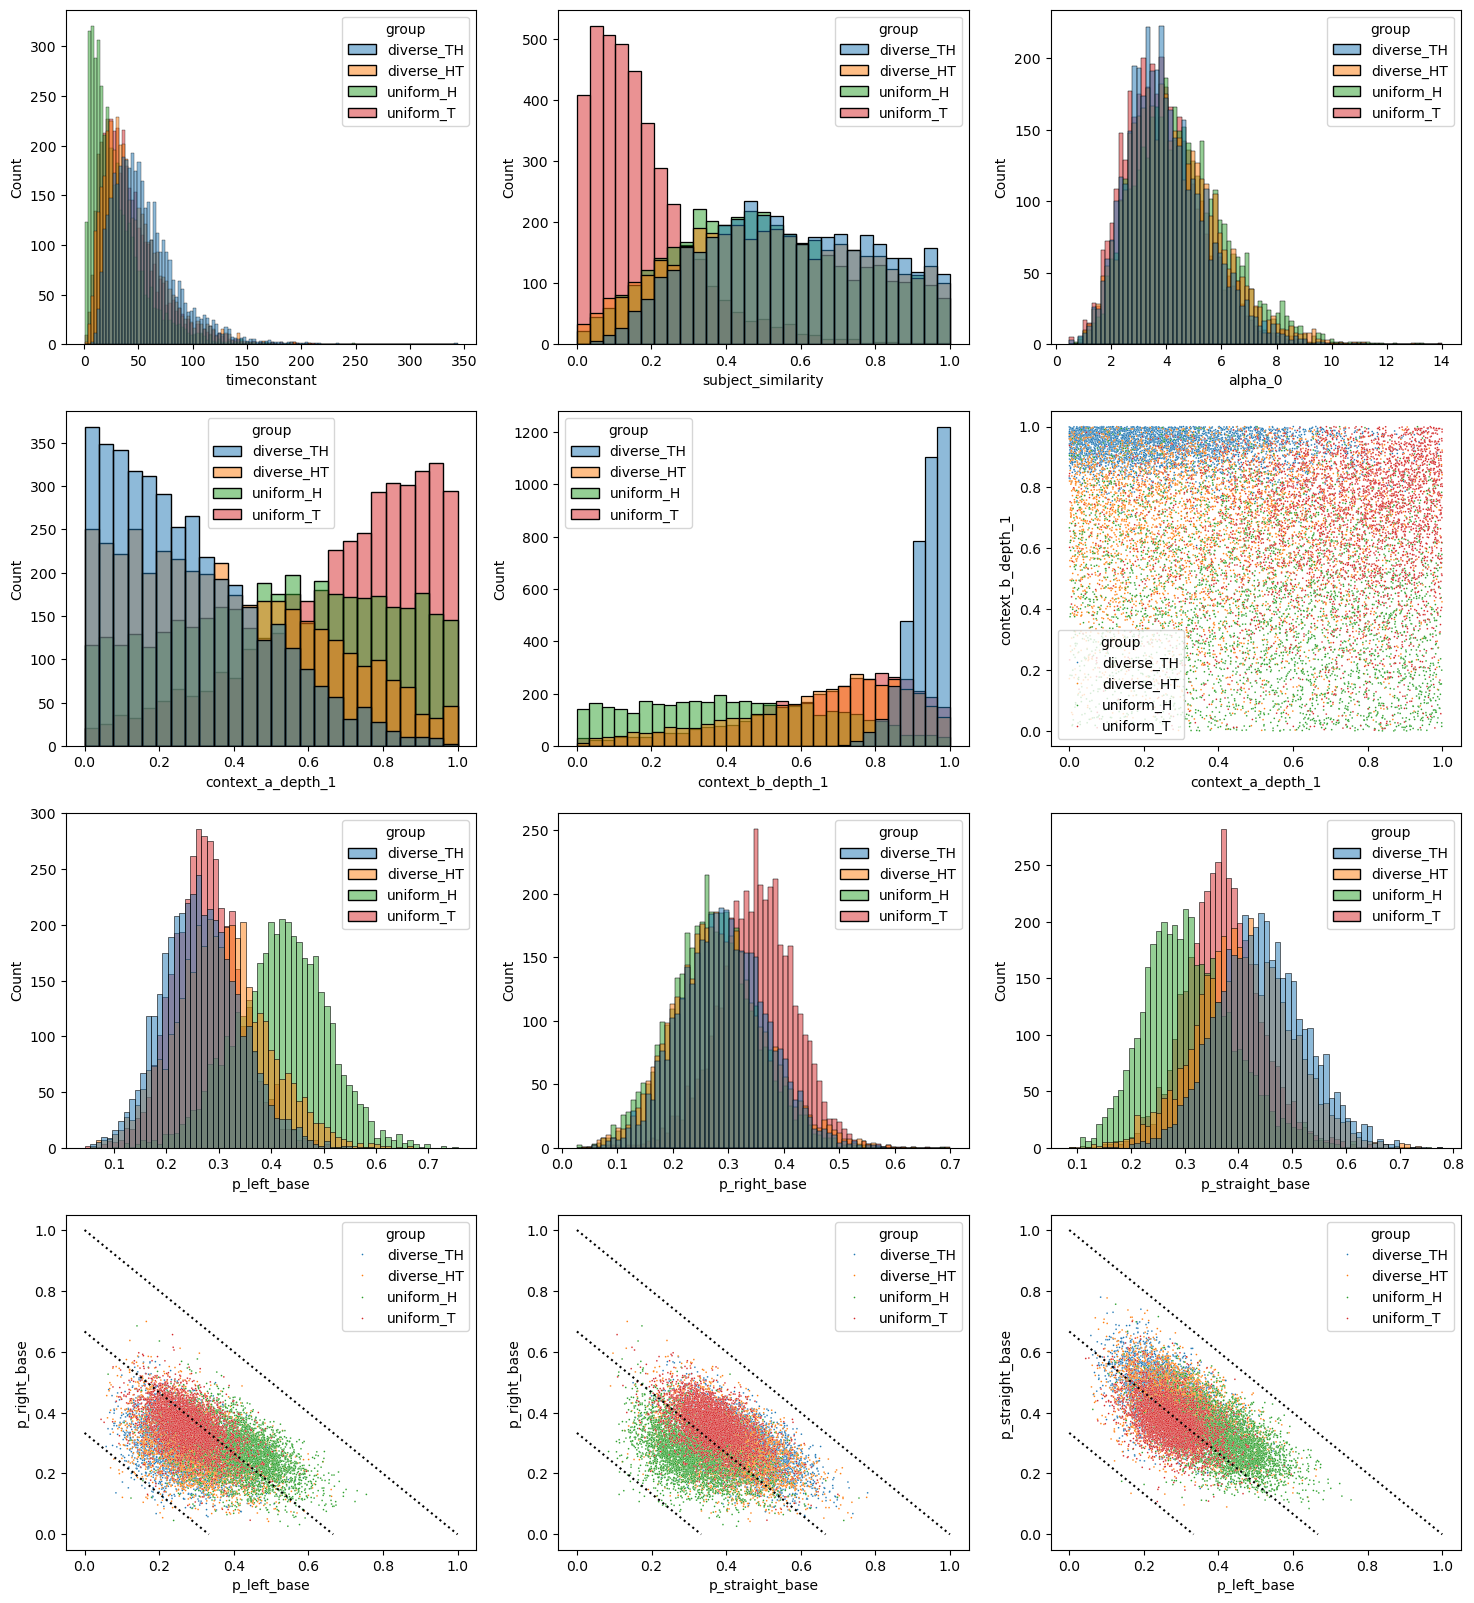

In [6]:
plot_population_fit()

/tmp/ipykernel_8678/4017730288.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alpha_0"] = df["alpha.1"] + df["alpha.2"] + df["alpha.3"]
/tmp/ipykernel_8678/4017730288.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["p_left_base"] = df["alpha.1"]/df["alpha_0"]
/tmp/ipykernel_8678/4017730288.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

TypeError: 'NoneType' object is not iterable

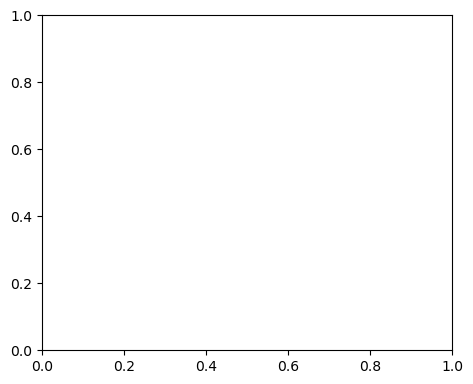

In [4]:
plot_population_fit(grps=["uniform", "diverse"])

In [ ]:
plot_population_fit(prefix="last_")

In [ ]:
def plot_individual_fits(prefix="indiv_", subgroups=False):

    fit_file = f"{results_directory}/{prefix}fit"
    fit_file += f".pkl"
    summary_fit_file = f"{results_directory}/{prefix}fit_summary"
    summary_fit_file += f".pkl"

    data_fits = pd.read_pickle(fit_file)
    summary_fits = pd.read_pickle(summary_fit_file)

    data_fits["alpha_0"] = data_fits["alpha.1"] + data_fits["alpha.2"] + data_fits["alpha.3"]
    data_fits["p_left_base"] = data_fits["alpha.1"]/data_fits["alpha_0"]
    data_fits["p_straight_base"] = data_fits["alpha.2"]/data_fits["alpha_0"]
    data_fits["p_right_base"] = data_fits["alpha.3"]/data_fits["alpha_0"]


    post_median = data_fits[["alpha_0", "p_left_base", "p_straight_base", "p_right_base", "subject"]].groupby("subject", as_index=False).median()
    post_mean = data_fits[["alpha_0", "p_left_base", "p_straight_base", "p_right_base", "subject"]].groupby("subject", as_index=False).mean()

    post_median["group"] = post_median["subject"].map(lambda x : dl.get_group(x, full=( subgroups)))
    post_mean["group"] = post_mean["subject"].map(lambda x : dl.get_group(x, full=( subgroups)))
    summary_fits["group"] = summary_fits["subject"].map(lambda x : dl.get_group(x, full=( subgroups)))

    NR = 2;
    NC = 2;
    plt.figure(figsize=(NC*6,NR*5))

    fig_num = 1;
    for pp in ["context_a_depth_1", "context_b_depth_1"]:
        plt.subplot(NR,NC,fig_num)
        sns.scatterplot(summary_fits.loc[pp], x="group", y="mean", hue="group")
        plt.title(pp)
        plt.subplot(NR,NC,fig_num+NC)
        sns.scatterplot(summary_fits.loc[pp], x="group", y="median", hue="group")
        plt.title(pp)
        fig_num += 1

In [ ]:
plot_individual_fits()